In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import scipy
from scipy.stats import spearmanr

In [3]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [4]:
import sklearn 
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [5]:
%matplotlib inline
rcParams['figure.figsize'] =5,4
sb.set_style('whitegrid')

In [6]:
adress='/home/deva/Desktop/AFI/mtcars.csv'

In [7]:
cars=pd.read_csv(adress)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
cars_data=cars.iloc[:,[5,11]]
cars_data

,drat,carb
0,3.90,4
1,3.90,4
2,3.85,1
3,3.08,1
4,3.15,2
5,2.76,1
6,3.21,4
7,3.69,2
8,3.92,2
9,3.92,4


In [9]:
#cars_data_names=['drat','carb']
Y=cars.iloc[:,9]

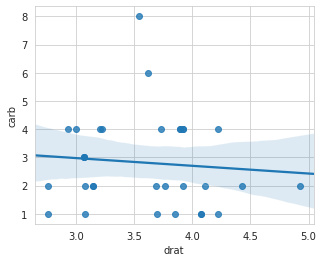

In [10]:
sb.regplot(x='drat' ,y='carb', data=cars,scatter=True)

In [11]:
drat =cars['drat']
carb=cars['carb']

spearmanr_coefficient, p_value=spearmanr(drat, carb)
print('Spearmanr Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
print('P-value is:', p_value)

Spearmanr Rank Correlation Coefficient -0.125
P-value is: 0.49468240297065824


In [12]:
cars.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

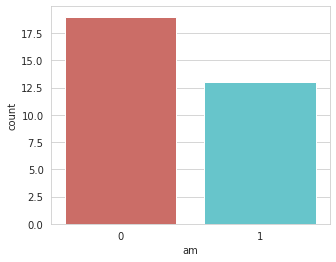

In [14]:
sb.countplot(x='am',data=cars,palette='hls')

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [22]:
X=scale(cars_data)
print(X)

[[ 0.57659448  0.74696708]
 [ 0.57659448  0.74696708]
 [ 0.48158406 -1.14010764]
 [-0.98157639 -1.14010764]
 [-0.84856181 -0.51108274]
 [-1.58964307 -1.14010764]
 [-0.7345493   0.74696708]
 [ 0.17755072 -0.51108274]
 [ 0.61459865 -0.51108274]
 [ 0.61459865  0.74696708]
 [ 0.61459865  0.74696708]
 [-1.00057848  0.11794217]
 [-1.00057848  0.11794217]
 [-1.00057848  0.11794217]
 [-1.26660765  0.74696708]
 [-1.13359306  0.74696708]
 [-0.69654514  0.74696708]
 [ 0.91863199 -1.14010764]
 [ 2.53380911 -0.51108274]
 [ 1.18466116 -1.14010764]
 [ 0.1965528  -1.14010764]
 [-1.58964307 -0.51108274]
 [-0.84856181 -0.51108274]
 [ 0.25355906  0.74696708]
 [-0.98157639 -0.51108274]
 [ 0.91863199 -1.14010764]
 [ 1.58370492 -0.51108274]
 [ 0.32956739 -0.51108274]
 [ 1.18466116  0.74696708]
 [ 0.04453613  2.00501689]
 [-0.10748054  3.26306671]
 [ 0.97563824 -0.51108274]]


In [17]:
LogReg=LogisticRegression()

In [23]:
LogReg.fit(X,Y)

/home/deva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(LogReg.score(X,Y))

0.8125


In [25]:
y_pred =LogReg.predict(X)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



In [27]:
print(list(y_pred))
print(list(Y))

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
